# Quadrature

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Settings](#toc2_)    
- 3. [Normal Gauss-Hermite](#toc3_)    
- 4. [Log-normal Gauss-Hermite](#toc4_)    
- 5. [Permanent-transitory income process](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

This notebook shows how to produce **Gauss-Hermite quadrature nodes and weights** with **consav.quadrature** for:

1. A normal variable
2. A log-normal variable
3. A permanent-transitory income process

**Problem:** Numerical integration by Monte Carlo is **slow**.

**Solution:** Use smarter integration formulas on the form

$$
\mathbb{E}[g(x)] \approx \sum_{i=1}^{n} w_ig(x_i) 
$$

where $(x_i,w_i), \forall n \in \{1,2,\dots,N\}$, are called **quadrature nodes and weights** and are provided by some theoretical formula depending on the distribution of $x$.

**Wikipedia:** [Gauss-Hermite quadrature](https://en.wikipedia.org/wiki/Gauss%E2%80%93Hermite_quadrature)

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

# load the module
from consav import quadrature

## 2. <a id='toc2_'></a>[Settings](#toc0_)

In [2]:
ns = [2,3,5,7,9,11,13,15]
sigmas = [0.10,0.20]
mus = [None,0.10,0.50]

## 3. <a id='toc3_'></a>[Normal Gauss-Hermite](#toc0_)

In [3]:
for sigma in sigmas:
    for mu in mus:
        
        if mu is None:
            print(f'### sigma = {sigma:.2f}, mu = None ###')            
        else:
            print(f'### sigma = {sigma:.2f}, mu = {mu:.2f} ###')
            
        for n in ns:
            x,w = quadrature.normal_gauss_hermite(n=n,sigma=sigma,mu=mu)
            mean = np.sum(x*w)
            std = np.sqrt(np.sum(w*(x-mean)**2))
            print(f'n = {n:2d}: mean = {mean:6.2f}, std = {std:6.2f}')
        
        print('')

### sigma = 0.10, mu = None ###
n =  2: mean =   0.00, std =   0.10
n =  3: mean =   0.00, std =   0.10
n =  5: mean =   0.00, std =   0.10
n =  7: mean =  -0.00, std =   0.10
n =  9: mean =  -0.00, std =   0.10
n = 11: mean =  -0.00, std =   0.10
n = 13: mean =   0.00, std =   0.10
n = 15: mean =  -0.00, std =   0.10

### sigma = 0.10, mu = 0.10 ###
n =  2: mean =   0.10, std =   0.10
n =  3: mean =   0.10, std =   0.10
n =  5: mean =   0.10, std =   0.10
n =  7: mean =   0.10, std =   0.10
n =  9: mean =   0.10, std =   0.10
n = 11: mean =   0.10, std =   0.10
n = 13: mean =   0.10, std =   0.10
n = 15: mean =   0.10, std =   0.10

### sigma = 0.10, mu = 0.50 ###
n =  2: mean =   0.50, std =   0.10
n =  3: mean =   0.50, std =   0.10
n =  5: mean =   0.50, std =   0.10
n =  7: mean =   0.50, std =   0.10
n =  9: mean =   0.50, std =   0.10
n = 11: mean =   0.50, std =   0.10
n = 13: mean =   0.50, std =   0.10
n = 15: mean =   0.50, std =   0.10

### sigma = 0.20, mu = None ###
n =  

**Illustration:**

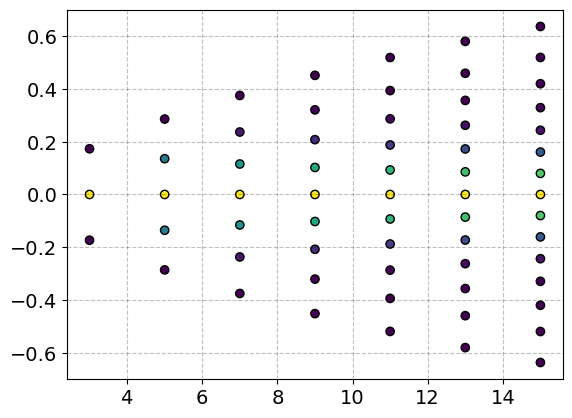

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for n in ns[1:]:
    x,w = quadrature.normal_gauss_hermite(0.1,n=n)
    h = ax.scatter(n*np.ones(n),x,c=w,edgecolor='black')
    
#fig.colorbar(h);    

## 4. <a id='toc4_'></a>[Log-normal Gauss-Hermite](#toc0_)

In [5]:
for sigma in sigmas:
    for mu in mus:
        
        if mu is None:
            print(f'### sigma = {sigma:.2f}, mu = None ###')            
        else:
            print(f'### sigma = {sigma:.2f}, mu = {mu:.2f} ###')
            
        for n in ns:
            x,w = quadrature.log_normal_gauss_hermite(n=n,sigma=sigma,mu=mu)
            mean = np.sum(x*w)
            std_log = np.sqrt(np.sum(w*(np.log(x)-np.log(mean))**2))
            print(f'n = {n:2d}: mean = {mean:6.2f}, std. of log = {std_log:6.2f}')
        
        print('')

### sigma = 0.10, mu = None ###
n =  2: mean =   1.00, std. of log =   0.10
n =  3: mean =   1.00, std. of log =   0.10
n =  5: mean =   1.00, std. of log =   0.10
n =  7: mean =   1.00, std. of log =   0.10
n =  9: mean =   1.00, std. of log =   0.10
n = 11: mean =   1.00, std. of log =   0.10
n = 13: mean =   1.00, std. of log =   0.10
n = 15: mean =   1.00, std. of log =   0.10

### sigma = 0.10, mu = 0.10 ###
n =  2: mean =   0.10, std. of log =   0.10
n =  3: mean =   0.10, std. of log =   0.10
n =  5: mean =   0.10, std. of log =   0.10
n =  7: mean =   0.10, std. of log =   0.10
n =  9: mean =   0.10, std. of log =   0.10
n = 11: mean =   0.10, std. of log =   0.10
n = 13: mean =   0.10, std. of log =   0.10
n = 15: mean =   0.10, std. of log =   0.10

### sigma = 0.10, mu = 0.50 ###
n =  2: mean =   0.50, std. of log =   0.10
n =  3: mean =   0.50, std. of log =   0.10
n =  5: mean =   0.50, std. of log =   0.10
n =  7: mean =   0.50, std. of log =   0.10
n =  9: mean =   0.50,

**Illustration:**

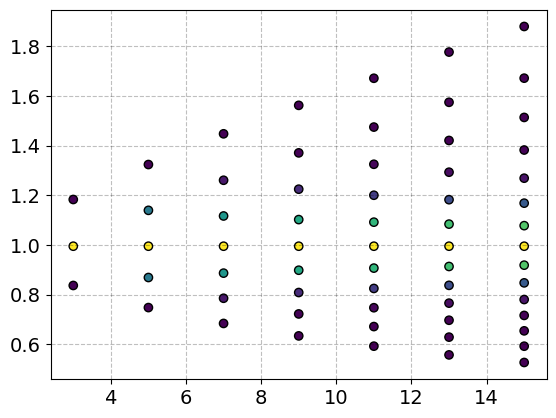

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for n in ns[1:]:
    x,w = quadrature.log_normal_gauss_hermite(0.1,n=n)
    h = ax.scatter(n*np.ones(n),x,c=w,edgecolor='black')
    
#fig.colorbar(h);    

## 5. <a id='toc5_'></a>[Permanent-transitory income process](#toc0_)

We consider the following specification:

$$ 
\begin{aligned}
y_{t} &=\xi_{t} p_{t} \\
p_{t} &=\psi_{t} p_{t-1} \\
\tilde{\xi}_{t+1} &= \begin{cases}
\mu & \text{with prob.}\pi\\
\frac{\xi_{t+1}-\pi\mu}{1-\pi} & \text{else}
\end{cases} \\
\end{aligned}
$$

where

$$ \begin{aligned}
\log\psi_{t+1} &\sim \mathcal{N}(-0.5\sigma_{\psi}^{2},\sigma_{\psi}^{2}) \\
\log\xi_{t+1} &\sim \mathcal{N}(-0.5\sigma_{\xi}^{2},\sigma_{\xi}^{2})
\end{aligned}
$$

In [7]:
# a. parameters    
sigma_psi = 0.1
Npsi = 5 # number of nodes
sigma_xi = 0.2
Nxi = 3 # number of nodes
mu = 0.3
    
# b. print
for pi in [0.0,0.01]:
    
    print(f'### pi = {pi:.3f} ###')
    
    # i. build
    psi,psi_w,xi,xi_w,Nshocks = quadrature.create_PT_shocks(sigma_psi,Npsi,sigma_xi,Nxi,pi,mu)
    
    # ii. nodes and weights
    for i in range(Nshocks):
        print(f'psi = {psi[i]:.2f}, xi = {xi[i]:.2f}, psi_w = {psi_w[i]:.2f}, xi_w = {xi_w[i]:.2f}')

    print('')
    
    # iii. mean and std
    mean_psi = np.sum(psi_w*xi_w*psi)
    std_log_psi = np.sqrt(np.sum(psi_w*xi_w*(np.log(psi)-np.log(mean_psi))**2))
    print(f'mean of psi = {mean_psi:.3f}, std. of log of psi = {std_log_psi:.3f}')

    mean_xi = np.sum(psi_w*xi_w*xi)
    std_log_xi = np.sqrt(np.sum(psi_w*xi_w*(np.log(xi)-np.log(mean_xi))**2))
    print(f'mean of xi  = {mean_xi:.3f}, std. of log of xi  = {std_log_xi:.3f}')
    
    print('')

### pi = 0.000 ###
psi = 0.75, xi = 0.69, psi_w = 0.01, xi_w = 0.17
psi = 0.75, xi = 0.98, psi_w = 0.01, xi_w = 0.67
psi = 0.75, xi = 1.39, psi_w = 0.01, xi_w = 0.17
psi = 0.87, xi = 0.69, psi_w = 0.22, xi_w = 0.17
psi = 0.87, xi = 0.98, psi_w = 0.22, xi_w = 0.67
psi = 0.87, xi = 1.39, psi_w = 0.22, xi_w = 0.17
psi = 1.00, xi = 0.69, psi_w = 0.53, xi_w = 0.17
psi = 1.00, xi = 0.98, psi_w = 0.53, xi_w = 0.67
psi = 1.00, xi = 1.39, psi_w = 0.53, xi_w = 0.17
psi = 1.14, xi = 0.69, psi_w = 0.22, xi_w = 0.17
psi = 1.14, xi = 0.98, psi_w = 0.22, xi_w = 0.67
psi = 1.14, xi = 1.39, psi_w = 0.22, xi_w = 0.17
psi = 1.32, xi = 0.69, psi_w = 0.01, xi_w = 0.17
psi = 1.32, xi = 0.98, psi_w = 0.01, xi_w = 0.67
psi = 1.32, xi = 1.39, psi_w = 0.01, xi_w = 0.17

mean of psi = 1.000, std. of log of psi = 0.100
mean of xi  = 1.000, std. of log of xi  = 0.201

### pi = 0.010 ###
psi = 0.75, xi = 0.30, psi_w = 0.01, xi_w = 0.01
psi = 0.75, xi = 0.70, psi_w = 0.01, xi_w = 0.16
psi = 0.75, xi = 0.99, psi_w = 